In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [2]:
filename = '../../../data/NBAShot Locations1997-2020.csv'

In [3]:
df = pd.read_csv(filename)

In [4]:
len(df)

4729512

In [5]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Game ID            int64 
 1   Game Event ID      int64 
 2   Player ID          int64 
 3   Player Name        object
 4   Team ID            int64 
 5   Team Name          object
 6   Period             int64 
 7   Minutes Remaining  int64 
 8   Seconds Remaining  int64 
 9   Action Type        object
 10  Shot Type          object
 11  Shot Zone Basic    object
 12  Shot Zone Area     object
 13  Shot Zone Range    object
 14  Shot Distance      int64 
 15  X Location         int64 
 16  Y Location         int64 
 17  Shot Made Flag     int64 
 18  Game Date          int64 
 19  Home Team          object
 20  Away Team          object
 21  Season Type        object
dtypes: int64(12), object(10)
memory usage: 793.8+ MB


In [7]:
df.describe()

,Game ID,Game Event ID,Player ID,Team ID,Period,Minutes Remaining,Seconds Remaining,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date
count,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06
mean,2.314379e+07,2.501681e+02,1.639145e+05,1.610613e+09,2.477790e+00,5.332437e+00,2.873821e+01,1.208963e+01,-1.316958e+00,7.634400e+01,4.517832e-01,2.008996e+07
std,5.521124e+06,1.589274e+02,3.733497e+05,8.595674e+00,1.139482e+00,3.468664e+00,1.745678e+01,9.850088e+00,1.100864e+02,8.703236e+01,4.976698e-01,6.512593e+04
min,2.000000e+07,1.000000e+00,3.000000e+00,1.610613e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+02,-5.200000e+01,0.000000e+00,1.997103e+07
25%,2.060015e+07,1.130000e+02,1.515000e+03,1.610613e+09,1.000000e+00,2.000000e+00,1.400000e+01,2.000000e+00,-6.000000e+01,3.000000e+00,0.000000e+00,2.003120e+07
50%,2.120030e+07,2.450000e+02,2.550000e+03,1.610613e+09,2.000000e+00,5.000000e+00,2.900000e+01,1.300000e+01,0.000000e+00,3.800000e+01,0.000000e+00,2.009033e+07
75%,2.170117e+07,3.750000e+02,2.019370e+05,1.610613e+09,3.000000e+00,8.000000e+00,4.400000e+01,2.100000e+01,5.600000e+01,1.450000e+02,1.000000e+00,2.015013e+07
max,4.990009e+07,1.012000e+03,1.629760e+06,1.610613e+09,8.000000e+00,1.200000e+01,5.900000e+01,8.900000e+01,2.500000e+02,8.840000e+02,1.000000e+00,2.020031e+07


In [8]:
def field_goal_percentage(name : str) -> int :
    total_shots = len(df[df['Player Name'] == name])
    assert total_shots > 0 , 'Player not Found'
    made_shots = len(df[(df['Player Name'] == name) & (df['Shot Made Flag'] == 1)])
    
    return (made_shots / total_shots) * 100

In [9]:
field_goal_percentage('Stephen Curry')

47.220252446461494

In [10]:
field_goal_percentage('LeBron James')

50.175332119495586

In [11]:
field_goal_percentage('Kevin Durant')

48.99364689552079

In [12]:
shot_type = df['Shot Type'].unique()
shot_type

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [13]:
for st in shot_type:
    shot_count = len(df[df['Shot Type'] == st])
    print(f'{st} : {shot_count}')

2PT Field Goal : 3606005
3PT Field Goal : 1123507


In [14]:
shot_zone_range = df['Shot Zone Range'].unique()
shot_zone_range

array(['8-16 ft.', 'Less Than 8 ft.', '24+ ft.', '16-24 ft.',
       'Back Court Shot'], dtype=object)

In [15]:
shot_zone_range_count = []
for szr in shot_zone_range:
    shot_count = len(df[df['Shot Zone Range'] == szr])
    print(f'{szr} : {shot_count}')
    shot_zone_range_count.append(shot_count)


8-16 ft. : 749100
Less Than 8 ft. : 1938200
24+ ft. : 1110619
16-24 ft. : 919994
Back Court Shot : 11599


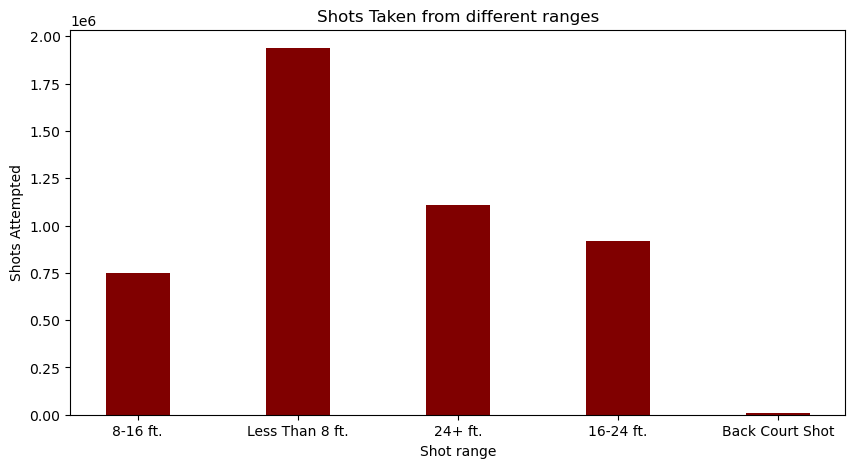

In [16]:
ig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(shot_zone_range, shot_zone_range_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Shot range")
plt.ylabel("Shots Attempted")
plt.title("Shots Taken from different ranges")
plt.show()

In [17]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


In [18]:
df['Game Date'] = df['Game Date'].astype(str)
df['year'] = df['Game Date'].str[:4].astype(int)
df['month'] = df['Game Date'].str[4:6].astype(int)
df['day'] = df['Game Date'].str[6:].astype(int)

In [30]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type,year,month,day
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,117,109,1,19980102,WAS,IND,Regular Season,1998,1,2
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,143,25,0,19980102,WAS,IND,Regular Season,1998,1,2
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,-87,55,0,19980102,WAS,IND,Regular Season,1998,1,2
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,-1,53,0,19980102,WAS,IND,Regular Season,1998,1,2
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,89,113,0,19980102,WAS,IND,Regular Season,1998,1,2


In [61]:
df_pivot = pd.pivot_table(df, values='Shot Made Flag', index='year', columns=['Shot Type'],
                          aggfunc='count')
df_pivot

Shot Type,2PT Field Goal,3PT Field Goal
year,,
1997,57236,10142
1998,110607,22072
1999,160796,32170
2000,171839,35203
2001,167928,35670
2002,168714,37548
2003,167630,38411
2004,160873,37765
2005,169245,42010


In [62]:
df_pivot.shape
df_pivot = df_pivot.drop([2020])


<Axes: xlabel='year'>

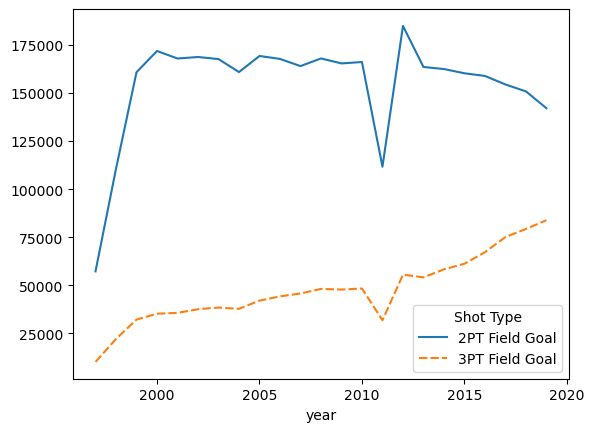

In [63]:
sns.lineplot(data=df_pivot)

<Axes: xlabel='year'>

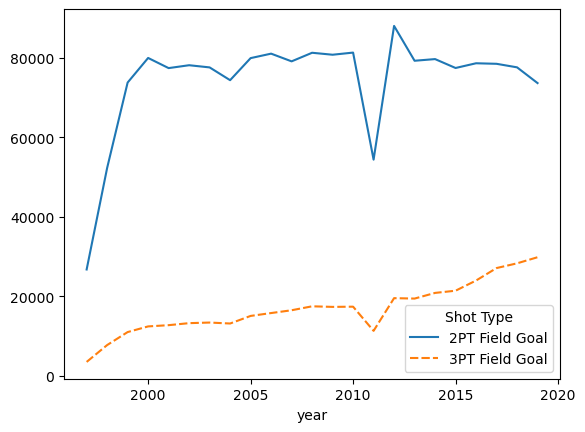

In [54]:
df_shot_made = df[df['Shot Made Flag'] == 1]
df_pivot_2 = pd.pivot_table(df_shot_made, values='Shot Made Flag', index='year', columns=['Shot Type'],
                          aggfunc='count')
df_pivot_2 = df_pivot_2.drop([2020])
sns.lineplot(data=df_pivot_2)

In [73]:
df['Shot Zone Basic'].unique()

array(['Mid-Range', 'In The Paint (Non-RA)', 'Left Corner 3',
       'Right Corner 3', 'Above the Break 3', 'Restricted Area',
       'Backcourt'], dtype=object)

In [74]:
df['Shot Zone Area'].unique()

array(['Right Side(R)', 'Left Side(L)', 'Center(C)',
       'Right Side Center(RC)', 'Left Side Center(LC)', 'Back Court(BC)'],
      dtype=object)

In [51]:
def plot_shot_chart(df,title):
    
    color = 'black'
    fig = plt.figure(figsize=(4.5, 3.76))
    ax = fig.add_axes([1, 0, 1, 1])
    ax.set_facecolor('white')
    ax.set_title(title)
    ax1 = fig.add_axes([0, 1, 1, 1])
   

    hb = ax.hexbin(df['X Location'], df['Y Location'] + 60, gridsize=(30, 30), extent=(-300, 300, -52, 884),bins='log', cmap='Blues')
    
    cb = fig.colorbar(hb, ax=ax1, label='Count')
    
    #code adapted from https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d
    #3-pt line sides
    ax.plot([-220,-220],[0,140],linewidth=2,color=color)
    ax.plot([220,220],[0,140],linewidth=2,color=color)
    
    #3pt arc
    ax.add_artist(mpl.patches.Arc((0,140),440,315,theta1=0,theta2=180,facecolor='none',edgecolor=color,lw=2))
    
    
    #Lane
    
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))

    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    #Player shots
    plt.show()
   
    
    
    

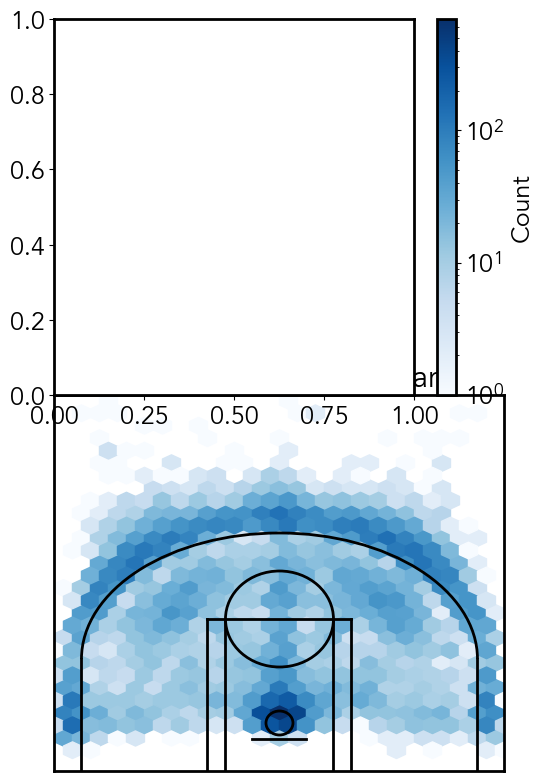

In [52]:
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

steph = df[df['Player Name'] == 'Stephen Curry']
plot_shot_chart(steph,title='Stephen Curry Shot chart')


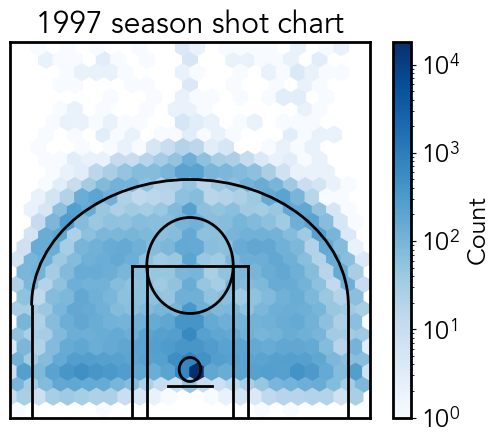

In [45]:
year_1997 = df[df['year'] == 1997]
plot_shot_chart(year_1997,title='1997 season shot chart')

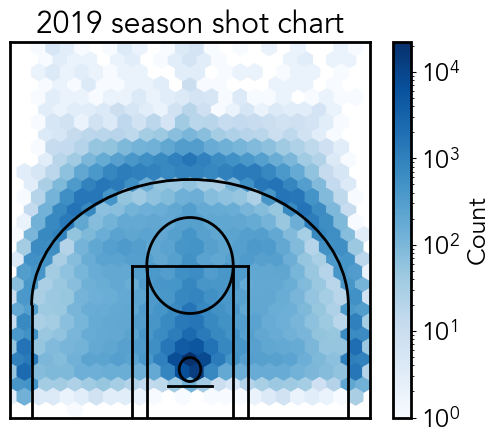

In [46]:
year_2019 = df[df['year'] == 2019]
plot_shot_chart(year_2019,title='2019 season shot chart')